## Import Necessary Function Definitons from the main "LMS" file

(47, 3) (47,)
(37, 3) (10, 3) (37,) (10,)
Test loss: 18.827601133597337


C:\Users\RAZORBLADE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[-0.0268629   0.78800568  0.00507005]


[-0.0268629   0.78800568  0.00507005]


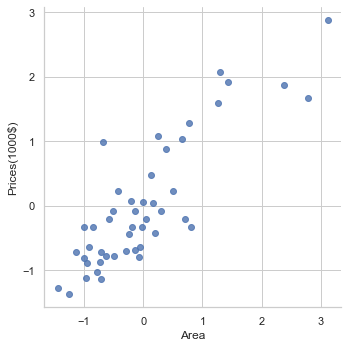

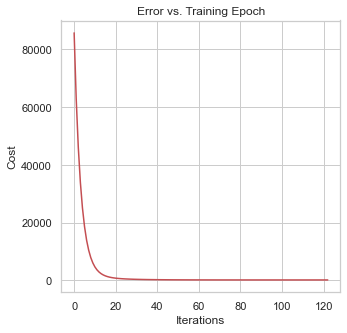

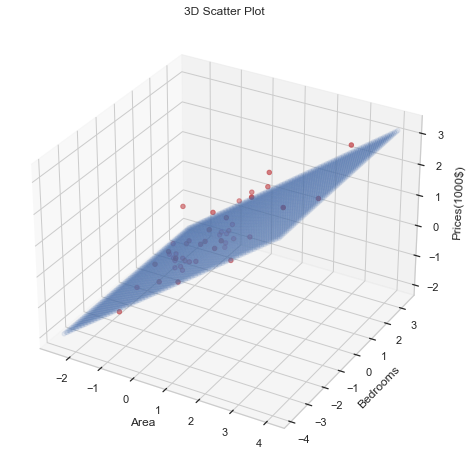

In [1]:
from ipynb.fs.full.LMS import cost_function, hypothesis,X_train,y_train,theta,plt,np,plot_hypothesis_plane_plotly,plot_hypothesis_plane_matplot

## Stochastic Gradient Descent

In [2]:
def stochastic_gradient_descent(theta, x, y, alpha, iterations,epsilon):
    '''
    This function calculates the stochastic gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    #print(theta,"cost is",cost_function(theta, x, y))
    #print(theta,"cost is",cost_function(theta, x, y))
    theta_list.append(theta)
    cost_list.append(cost_function(theta, x, y))
    for u in range(iterations):
        for i in range(1,len(y)):
            for j in range(len(theta)):
                theta[j] = theta[j] + alpha*(1/(len(y)))*(y[i]-hypothesis(theta,x[i]))*x[i][j]
        #print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(theta)
        cost_list.append(cost_function(theta, x, y))
        if u>0:
            if cost_list[u-1]-cost_list[u] < epsilon:
                break
        

    return theta, theta_list, cost_list

In [3]:
theta = np.zeros(3)
theta[1]=6
theta[2]=8
theta, theta_list, cost_list = stochastic_gradient_descent(theta, X_train, y_train, 0.1, 1000,0.01)
itrs=len(cost_list)
print(itrs)

141


Text(0.5, 1.0, 'Error vs. Training Epoch')

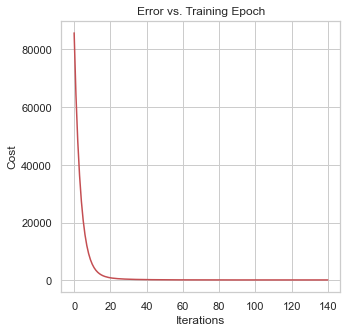

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(itrs), cost_list, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [5]:
plot_hypothesis_plane_plotly(theta)

[-0.04432013  0.77925863  0.01602303]


[-0.04432013  0.77925863  0.01602303]


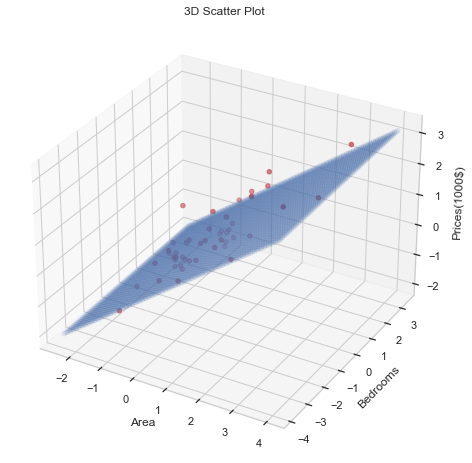

In [6]:
plot_hypothesis_plane_matplot(theta)

## Contour plot of J vs theta
Contour plot shows how our "theta" is converging to minimize our Cost Function.

In [7]:
def contour_sto(alpha):
    #calculate theta using batch gradient descent - training step
    theta = np.zeros(3)
    theta[1]=6
    theta[2]=8
    theta, theta_list, cost_list = stochastic_gradient_descent(theta, X_train, y_train, alpha, 10000,0.01)
    #print total no of iterations
    itrs=len(cost_list)
    print("Total no of iterations:", itrs)
    #Plot a contour plot of the cost function vs theta1 and theta2
    #create a meshgrid of theta1 and theta2
    theta_list = np.array([list(t) for t in theta_list])
    print("THETA", theta_list)
    theta1_min, theta1_max = theta_list[:,1].min() - 1, theta_list[:,1].max() + 1
    theta2_min, theta2_max = theta_list[:,2].min() - 1, theta_list[:,2].max() + 1
    theta1_grid, theta2_grid = np.meshgrid(np.arange(theta1_min, theta1_max, 0.1), np.arange(theta2_min, theta2_max, 0.1))
    fig, ax = plt.subplots(1, 1, figsize=(8,8))
    
    Z = cost_function(np.c_[np.ones(theta1_grid.ravel().shape[0]), theta1_grid.ravel(), theta2_grid.ravel()], X_train, y_train)
    
    Z = Z.reshape(theta1_grid.shape)
    print(Z)
    
    # plot contour plot wothout background color and line color based on z values
    ax.contourf(theta1_grid, theta2_grid, Z, cmap=plt.cm.cool,  levels = np.linspace(Z.min(), Z.max(), 30))
    # ax.contour(theta1_grid, theta2_grid, Z, colors='k', levels=30)

    ax.scatter(theta_list[0][1], theta_list[0][2], c='r', s=40)
    #put alpha value on the plot
    ax.text(0.05, 0.95, 'alpha = %.2f' % alpha, transform=ax.transAxes, fontsize=14, verticalalignment='top')
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_title('Contour Plot of Cost Function')
    #plot theta_list on the contour plot
    for i in range(len(theta_list)):
        ax.scatter(theta_list[i][1], theta_list[i][2], c='r', s=40)
        
    plt.show()


Total no of iterations: 256
THETA [[-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.02145317]
 [-0.04463454  0.77212951  0.0

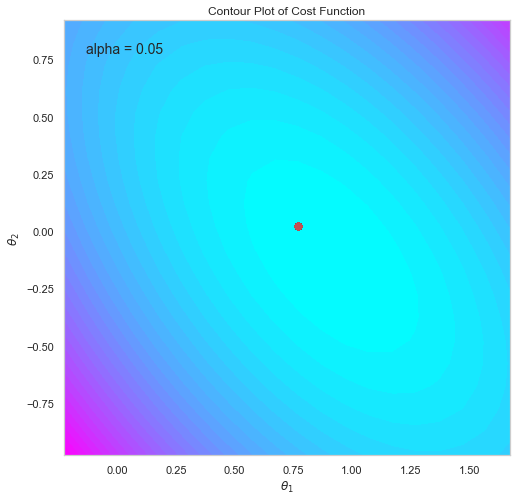

Total no of iterations: 141
THETA [[-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.01602303]
 [-0.04432013  0.77925863  0.0

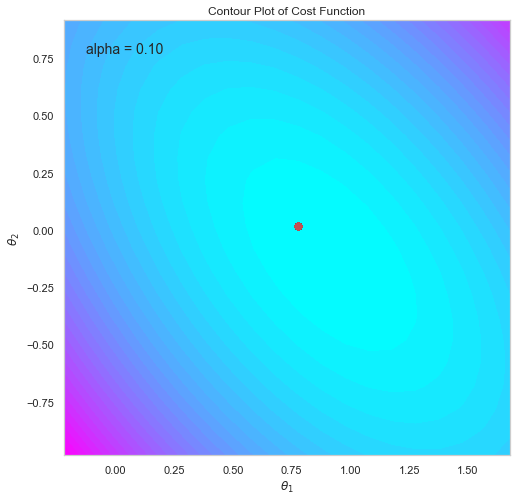

Total no of iterations: 100
THETA [[-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.01374249]
 [-0.04453747  0.78377096  0.0

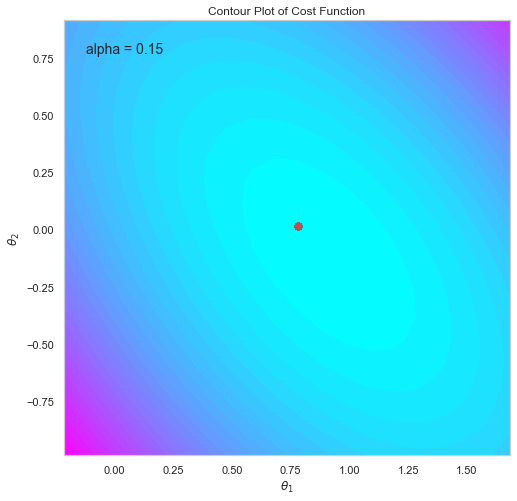

Total no of iterations: 78
THETA [[-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01275253]
 [-0.04496757  0.78718622  0.01

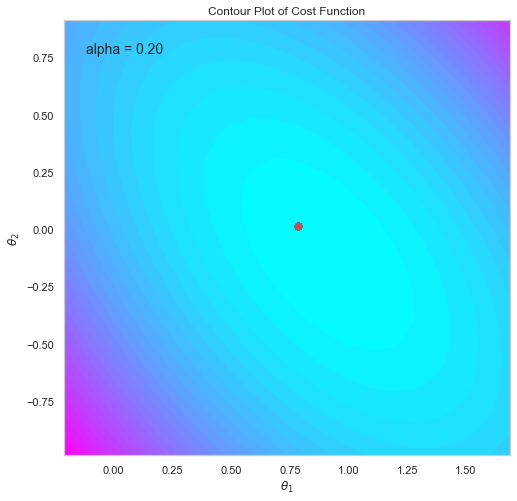

Total no of iterations: 65
THETA [[-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01190059]
 [-0.04542228  0.79043939  0.01

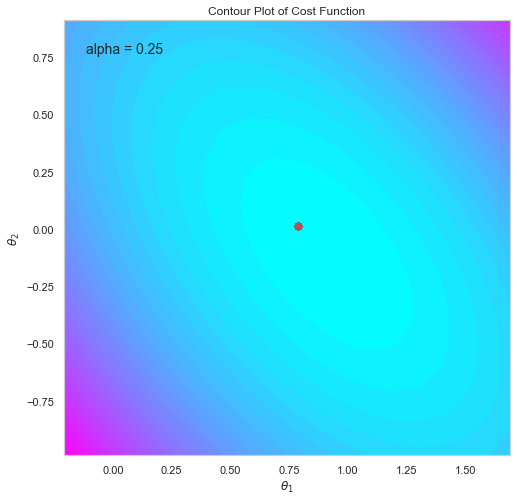

Total no of iterations: 55
THETA [[-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01181334]
 [-0.04599231  0.79302893  0.01

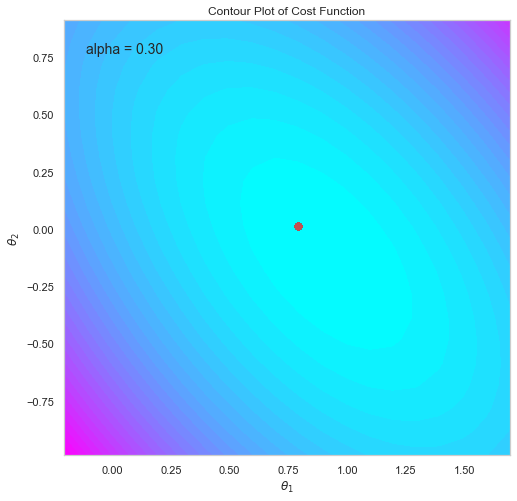

Total no of iterations: 48
THETA [[-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01165561]
 [-0.04654837  0.79562747  0.01

In [8]:
#create an array of learning rates from 0.05 to 0.95 in steps of 0.05
learning_rates = np.arange(0.05, 0.95, 0.05)
# contour_plot(learning_rates)
# k=1
for i in learning_rates:
    contour_sto(i)
    # k+=1